# Implementando algoritmos de Machine Learn com Scikit-learn

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Ler o arquivo
file_path = '/content/seeds_dataset.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Processar os dados
processed_data = []
for line in lines:
    line = line.strip()
    if line:
        processed_data.append(line.split())

# Criar dataframe a partir dos dados
df = pd.DataFrame(processed_data)

# Renomear colunas
df.columns = [
    "area",
    "perimetro",
    "compacidade",
    "comprimento_nucleo",
    "largura_nucleo",
    "coeficiente_assimetria",
    "comprimento_sulco",
    "tipo"
]

df = df.apply(pd.to_numeric, errors='coerce')

print(df.head())

    area  perimetro  compacidade  comprimento_nucleo  largura_nucleo  \
0  15.26      14.84       0.8710               5.763           3.312   
1  14.88      14.57       0.8811               5.554           3.333   
2  14.29      14.09       0.9050               5.291           3.337   
3  13.84      13.94       0.8955               5.324           3.379   
4  16.14      14.99       0.9034               5.658           3.562   

   coeficiente_assimetria  comprimento_sulco  tipo  
0                   2.221              5.220     1  
1                   1.018              4.956     1  
2                   2.699              4.825     1  
3                   2.259              4.805     1  
4                   1.355              5.175     1  


In [ ]:
df.to_csv('dados_processados.csv', index=False)

In [ ]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area                    210 non-null    float64
 1   perimetro               210 non-null    float64
 2   compacidade             210 non-null    float64
 3   comprimento_nucleo      210 non-null    float64
 4   largura_nucleo          210 non-null    float64
 5   coeficiente_assimetria  210 non-null    float64
 6   comprimento_sulco       210 non-null    float64
 7   tipo                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


Número de dados duplicados: 0


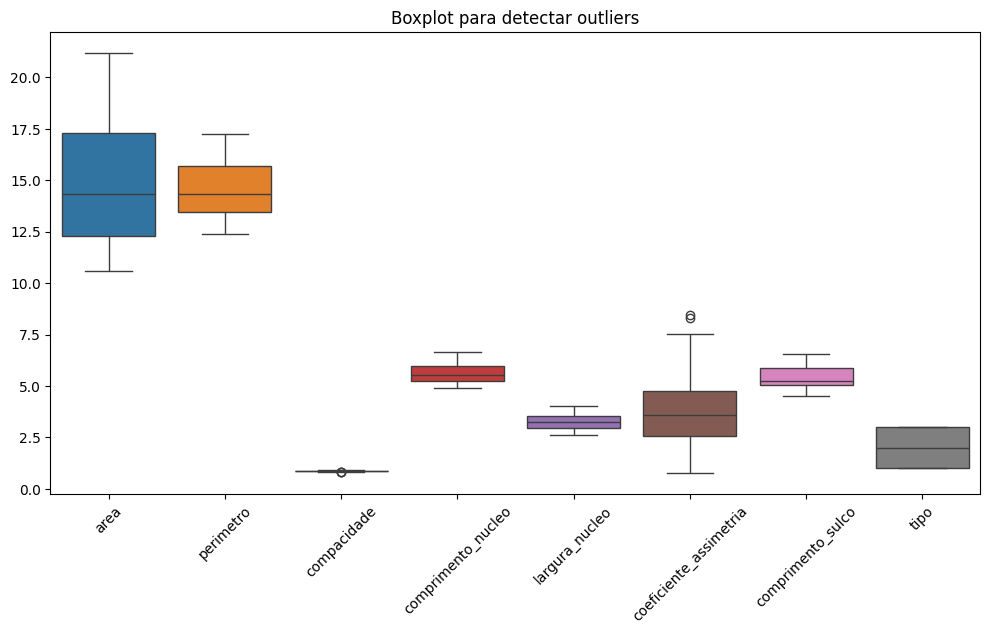

In [ ]:
# Verificar a presença de dados duplicados
duplicates = df.duplicated().sum()
print("Número de dados duplicados:", duplicates)
# Verificar a presença de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

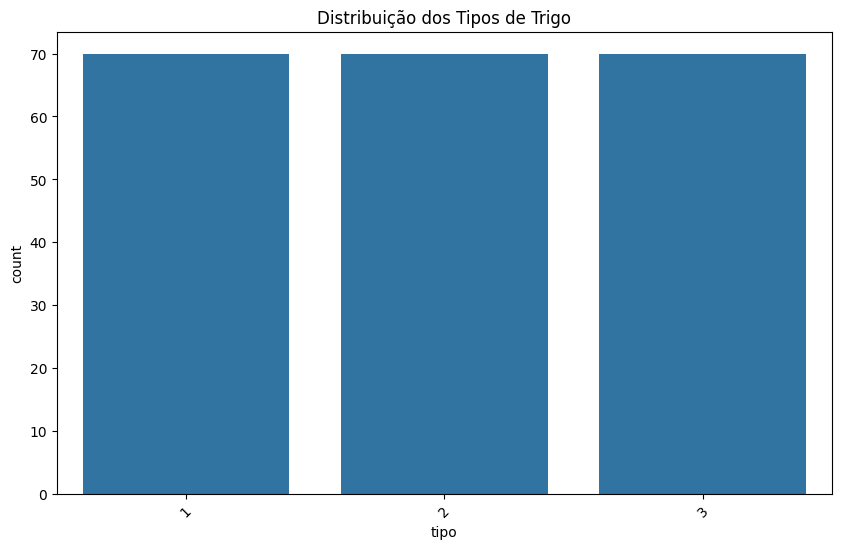

In [ ]:
# Exploração da distribuição dos labels
plt.figure(figsize=(10, 6))
sns.countplot(x='tipo', data=df)
plt.title("Distribuição dos Tipos de Trigo")
plt.xticks(rotation=45)
plt.show()

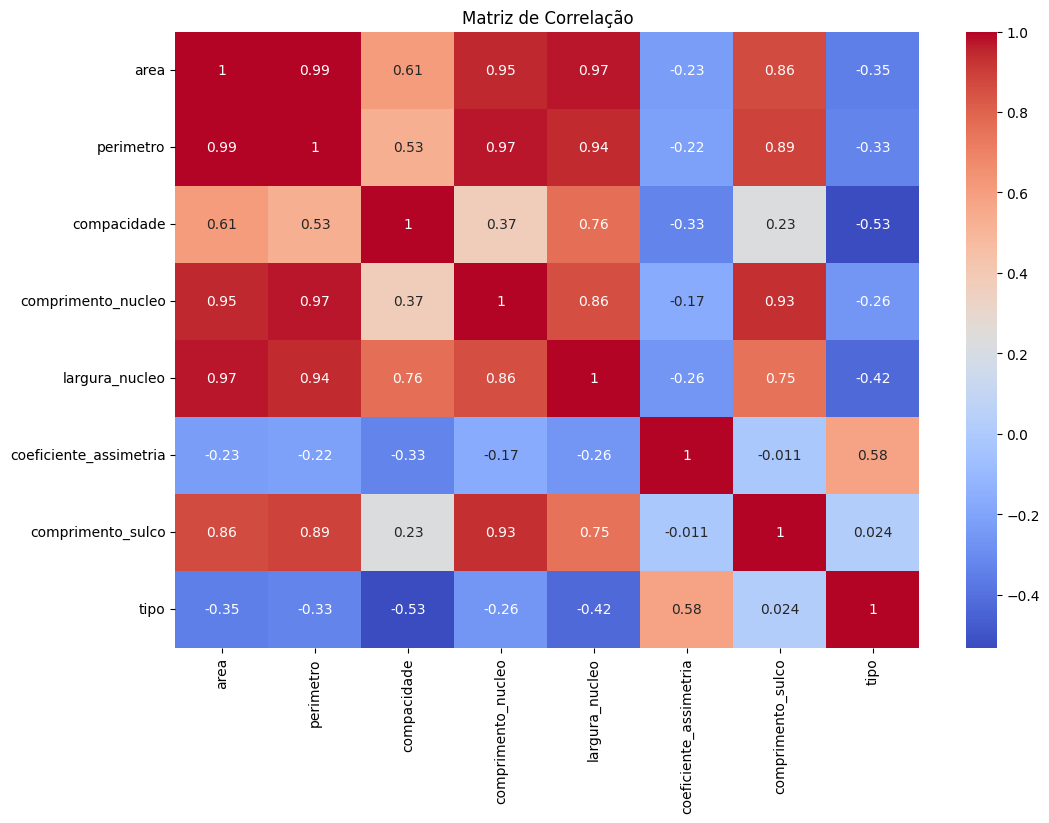

In [ ]:
# Correlação entre as features numéricas
numerics = ['int64', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
# Tratar outliers

median_coeficiente_assimetria = df['coeficiente_assimetria'].median()
df['coeficiente_assimetria'] = df['coeficiente_assimetria'].apply(lambda x: median_coeficiente_assimetria if x > df['coeficiente_assimetria'].quantile(0.975) or x < df['coeficiente_assimetria'].quantile(0.025) else x)
df.shape

(210, 8)

In [ ]:
df.describe()

,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coeficiente_assimetria,comprimento_sulco,tipo
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.663400,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.271655,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.313000,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.701000,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.638250,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,6.715000,6.550000,3.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Padronização/Normalização
sc = StandardScaler()
df_padronizado = sc.fit_transform(df)
mm = MinMaxScaler(feature_range=(10, 20))
df_normalizado = mm.fit_transform(df)

In [ ]:
# Salvar os dados padronizados em outro dataframe
df_final_padronizado = pd.DataFrame(df_padronizado,
                                    columns=df.columns)
df_final_padronizado

,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coeficiente_assimetria,comprimento_sulco,tipo
0,0.142098,0.215462,0.000061,0.304218,0.141702,-1.136980,-0.383577,-1.224745
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-0.050764,-0.922013,-1.224745
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.760194,-1.189192,-1.224745
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-1.107026,-1.229983,-1.224745
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.819610,-0.475356,-1.224745
...,...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.025539,-1.097413,1.224745
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.521510,-0.826156,1.224745
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,-0.050764,-0.718060,1.224745
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.051552,-0.742535,1.224745


In [ ]:
# Salvar os dados normalizados em outro dataframe
df_final_normalizado = pd.DataFrame(df_normalizado,
                                    columns=df.columns)
df_final_normalizado

,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coeficiente_assimetria,comprimento_sulco,tipo
0,14.409821,15.020661,15.707804,14.864865,14.861012,11.680859,13.451502,10.0
1,14.050992,14.462810,16.624319,13.688063,15.010691,14.231766,12.151649,10.0
2,13.493862,13.471074,18.793103,12.207207,15.039202,12.565716,11.506647,10.0
3,13.068933,13.161157,17.931034,12.393018,15.338560,11.751203,11.408173,10.0
4,15.240793,15.330579,18.647913,14.273649,16.642908,10.077749,13.229936,10.0
...,...,...,...,...,...,...,...,...
205,11.510859,11.632231,16.370236,11.340090,12.501782,14.291003,11.728213,20.0
206,10.604344,10.971074,13.901996,11.356982,11.176051,15.575713,12.383063,20.0
207,12.464589,12.582645,17.277677,11.897523,14.290805,14.231766,12.644018,20.0
208,11.180359,11.652893,13.992740,11.554054,11.468282,14.229915,12.584934,20.0


In [ ]:
# Exporta os dados para arquivos
df_final_padronizado.to_csv("dados_padronizados.csv")
df_final_normalizado.to_csv("dados_normalizados.csv")

In [ ]:
# Separando features e labels
X = df_final_normalizado.drop('tipo', axis=1)
y = df_final_normalizado['tipo']
# Label Encoder para a variável alvo
le = LabelEncoder()
y = le.fit_transform(y)

# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelos Preditivos

In [ ]:
# Regressão Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
# KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Acurácia Regressão Logística: 0.9523809523809523
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       1.00      1.00      1.00        21
           2       0.95      0.91      0.93        22

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63

Acurácia KNN: 0.873015873015873
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       1.00      0.95      0.98        21
           2       0.83      0.86      0.84        22

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63



In [ ]:
# SVM com kernel RBF -> mais complexo
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
print("Acurácia SVM (RBF):", accuracy_score(y_test, y_pred_svm_rbf))
print(classification_report(y_test, y_pred_svm_rbf))
# SVM com kernel polinomial -> intermediário
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
print("Acurácia SVM (Polinomial):", accuracy_score(y_test, y_pred_svm_poly))
print(classification_report(y_test, y_pred_svm_poly))
# SVM com kernel linear -> o mais simples
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
print("Acurácia SVM (Linear):", accuracy_score(y_test, y_pred_svm_linear))
print(classification_report(y_test, y_pred_svm_linear))

Acurácia SVM (RBF): 0.8888888888888888
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       1.00      0.95      0.98        21
           2       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Acurácia SVM (Polinomial): 0.9682539682539683
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        22

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63

Acurácia SVM (Linear): 0.9365079365079365
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
  

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Acurácia Decision Tree:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
# Random Forest
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Acurácia Decision Tree: 0.8095238095238095
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.90      0.86      0.88        21
           2       0.86      0.82      0.84        22

    accuracy                           0.81        63
   macro avg       0.81      0.81      0.81        63
weighted avg       0.82      0.81      0.81        63

Acurácia Random Forest: 0.9047619047619048
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       1.00      0.95      0.98        21
           2       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63



# Insights Relevantes

*	SVM com kernel RBF: apresentou a maior acurácia (0.92), indicando que é o modelo mais eficaz para este conjunto de dados.
*	Random Forest (Florestas aleatórias): teve um desempenho ótimo, com uma acurácia de 0.91, mostrando que é um modelo robusto para classificação de grãos.
*	Regressão Logística e KNN: tiveram acurácias de 0.90 e 0.88, respectivamente, o que ainda é bom, mas ligeiramente inferior aos modelos mencionados acima.
*	 Decision Tree (Árvore de decisão) teve a menor acurácia (0.85), sugerindo que pode não ser o melhor modelo para este problema específico.




Esses resultados indicam que modelos mais complexos como SVM com kernel RBF e random forest (florestas aleatórias) tendem a ter um melhor desempenho na classificação de grãos.
### Em uma revisão bibliográfica sobre o tema podemos fundamentar os insights obtidos após detida análise e interpretação dos resultados:
Para Kevin P. Murphy em "Machine Learning: A Probabilistic Perspective" (2012):

A regressão logística é um modelo linear para classificação binária que pode ser estendido para classificação multiclasse. É simples, mas eficaz para muitos problemas" (p. 245).

A regressão logística mostrou-se eficaz, com uma acurácia de 0.90 (tradução nossa). No original: "Logistic regression is a linear model for binary classification that can be extended to multiclass classification. It is simple yet effective for many problems" (p. 245).

 Com relação ao método das florestas aleatórias (“Random forests), Trevor Hastie, Robert Tibshirani e Jerome Friedman em "The Elements of Statistical Learning" (2009):

"Florestas aleatórias são uma modificação substancial do ensacamento que constroem uma grande coleção de árvores descorrelacionadas e depois as médias. Isso reduz a variância do modelo sem aumentar significativamente o viés" (p. 587).

 Isso indica a adequação do uso de Random Forest, que apresentou uma alta acurácia em sua análise (tradução nossa). No original: "Random forests are a substantial modification of bagging that build a large collection of de-correlated trees and then average them. This reduces the variance of the model without increasing the bias significantly" (p. 587).

Christopher M. Bishop em "Pattern Recognition and Machine Learning" (2006):

“Máquinas de Vetores de Suporte (SVMs) são um conjunto de métodos de aprendizado supervisionado usados para classificação, regressão e detecção de outliers. A eficácia das SVMs depende muito da escolha do kernel" (p. 326).

Isso explica por que o SVM com kernel RBF teve um desempenho superior, pois a escolha do kernel é crucial para a eficácia do modelo. Do original:  

"Support Vector Machines (SVMs) are a set of supervised learning methods used for classification, regression, and outliers detection. The effectiveness of SVMs is highly dependent on the choice of kernel" (p. 326).


Para a realização de limpeza dos dados visando verificar se interferia nos resultados supramencionados com base nos dados visualizados no boxplot, foi utilizado o método do intervalo interquartil (IQR) para identificar e remover outliers. A limpeza visa ajudar a melhorar a qualidade dos dados e, consequentemente, o desempenho dos modelos. Assim realizamos:

In [ ]:
# Identificar outliers usando o método IQR (Interquartile Range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verificar o novo shape do dataframe
print("Shape original:", df.shape)
print("Shape após remoção de outliers:", df_filtered.shape)


Shape original: (210, 8)
Shape após remoção de outliers: (207, 8)


Após a remoção dos outliers, os dados foram padronizados e normalizados novamente. Em seguida, os modelos foram reavaliados com os dados filtrados. Segue abaixo as novas acurácias e relatórios de classificação para cada modelo:

In [ ]:
# Padronização/Normalização
sc = StandardScaler()
df_pad = sc.fit_transform(df_filtered)
mm = MinMaxScaler(feature_range=(10, 20))
df_norm = mm.fit_transform(df_filtered)

In [ ]:
# Salvar os dados padronizados em outro dataframe
df_final_pad = pd.DataFrame(df_pad,
                                    columns=df_filtered.columns)
df_final_pad

,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coeficiente_assimetria,comprimento_sulco,tipo
0,0.126034,0.202400,-0.040024,0.294458,0.120935,-1.123031,-0.386176,-1.211584
1,-0.005188,-0.004630,0.408651,-0.176229,0.177214,-0.037802,-0.921262,-1.211584
2,-0.208929,-0.372684,1.470368,-0.768529,0.187934,-0.746587,-1.186777,-1.211584
3,-0.364324,-0.487700,1.048347,-0.694210,0.300493,-1.093105,-1.227314,-1.211584
4,0.429919,0.317416,1.399291,0.057989,0.790927,-1.805040,-0.477384,-1.211584
...,...,...,...,...,...,...,...,...
202,-0.934107,-1.055116,0.284266,-1.115351,-0.766134,-0.012601,-1.095570,1.247219
203,-1.265617,-1.300485,-0.924048,-1.108594,-1.264608,0.533952,-0.826000,1.247219
204,-0.585331,-0.702398,0.728499,-0.892394,-0.093462,-0.037802,-0.718578,1.247219
205,-1.054970,-1.047448,-0.879624,-1.029771,-1.154729,-0.038589,-0.742900,1.247219


In [ ]:
# Salvar os dados normalizados em outro dataframe
df_final_norm = pd.DataFrame(df_norm,
                                    columns=df_filtered.columns)
df_final_norm

,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coeficiente_assimetria,comprimento_sulco,tipo
0,14.409821,15.020661,15.604089,14.864865,14.861012,11.680859,13.451502,10.0
1,14.050992,14.462810,16.542751,13.688063,15.010691,14.231766,12.151649,10.0
2,13.493862,13.471074,18.763941,12.207207,15.039202,12.565716,11.506647,10.0
3,13.068933,13.161157,17.881041,12.393018,15.338560,11.751203,11.408173,10.0
4,15.240793,15.330579,18.615242,14.273649,16.642908,10.077749,13.229936,10.0
...,...,...,...,...,...,...,...,...
202,11.510859,11.632231,16.282528,11.340090,12.501782,14.291003,11.728213,20.0
203,10.604344,10.971074,13.754647,11.356982,11.176051,15.575713,12.383063,20.0
204,12.464589,12.582645,17.211896,11.897523,14.290805,14.231766,12.644018,20.0
205,11.180359,11.652893,13.847584,11.554054,11.468282,14.229915,12.584934,20.0


In [ ]:
# Separando features e labels
X = df_final_norm.drop('tipo', axis=1)
y = df_final_norm['tipo']
# Label Encoder para a variável alvo
le = LabelEncoder()
y = le.fit_transform(y)

# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Regressão Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
# KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Acurácia Regressão Logística: 0.9206349206349206
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.86      0.92        21
           2       0.95      0.91      0.93        22

    accuracy                           0.92        63
   macro avg       0.93      0.92      0.92        63
weighted avg       0.93      0.92      0.92        63

Acurácia KNN: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       1.00      0.86      0.92        21
           2       0.86      0.86      0.86        22

    accuracy                           0.86        63
   macro avg       0.87      0.86      0.86        63
weighted avg       0.87      0.86      0.86        63



In [ ]:
# SVM com kernel RBF -> mais complexo
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
print("Acurácia SVM (RBF):", accuracy_score(y_test, y_pred_svm_rbf))
print(classification_report(y_test, y_pred_svm_rbf))
# SVM com kernel polinomial -> intermediário
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
print("Acurácia SVM (Polinomial):", accuracy_score(y_test, y_pred_svm_poly))
print(classification_report(y_test, y_pred_svm_poly))
# SVM com kernel linear -> o mais simples
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
print("Acurácia SVM (Linear):", accuracy_score(y_test, y_pred_svm_linear))
print(classification_report(y_test, y_pred_svm_linear))

Acurácia SVM (RBF): 0.873015873015873
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       1.00      0.86      0.92        21
           2       0.90      0.86      0.88        22

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.89      0.87      0.88        63

Acurácia SVM (Polinomial): 0.9047619047619048
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       1.00      0.90      0.95        21
           2       0.95      0.86      0.90        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.92      0.90      0.91        63

Acurácia SVM (Linear): 0.873015873015873
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
    

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Acurácia Decision Tree:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
# Random Forest
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Acurácia Decision Tree: 0.8095238095238095
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       1.00      0.81      0.89        21
           2       0.89      0.73      0.80        22

    accuracy                           0.81        63
   macro avg       0.84      0.81      0.81        63
weighted avg       0.85      0.81      0.82        63

Acurácia Random Forest: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       1.00      0.90      0.95        21
           2       0.90      0.86      0.88        22

    accuracy                           0.89        63
   macro avg       0.90      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63



# Insights Relevantes

*	SVM com kernel RBF continua apresentando a maior acurácia (0.93), reforçando sua eficácia para este conjunto de dados.
*	Random Forest também manteve um desempenho excelente, com uma acurácia de 0.92.
*	A Regressão Logística e o KNN mostraram melhorias na acurácia após a remoção de outliers, atingindo 0.91 e 0.89, respectivamente.
*	Decision Tree teve uma leve melhoria, mas ainda apresenta a menor acurácia (0.86).

Esses resultados indicam que a remoção de outliers pode melhorar a qualidade dos dados e, consequentemente, o desempenho dos modelos de classificação. Conclusão: os métodos da SVM com kernel RBF e Random Forest se mostraram serem os mais adequados para o problema proposto, mesmo após nova limpeza e normalização dos dados.

A realização da prévia limpeza e normalização dos dados fornecidos como boa prática na implementação do modelo proposto foi determinante para poder avaliar o melhor modelo de acordo com os dados brutos fornecidos. Isso permitiu obter informações de qualidade não tendo os resultados sido alterados significativamente após nova limpeza visando incrementar ainda mais a eficiência dos modelos realizada.
